# Earnings by College Major: Quantifying the STEM Gender Gap

by Daniel Zayas & Ivan Rodriguez

### Summary
* 58% of college students are women
* There is no correlation between major popularity and earnings
* 7 out of 10 of the top-earning majors have 20% women or less
* All of the lowest-earning majors are majority-female, and 6 out of 10 have 80% women or more
* Grouping majors by their category, the 1) Engineering and 2) Computers & Mathematics categories have the highest earnings. They are 76% and 70% male, respectively.

### Source
American Community Survey (ACS) conducts surveys, aggregates the data, and makes the data available to the public via the United States Census Bureau website. The raw data on earnings by college majors is available in the "2010-2012 ACS 3-year PUMS" survey, which can be downloaded [here](https://www.census.gov/programs-surveys/acs/data/pums.html).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
# plots are displayed inline
import statistics

recent_grads = pd.read_csv('recent-grads.csv')

## Quick summary of the dataset

Here are some important columns from the dataset:

* Rank - Rank by median earnings (the dataset is ordered by this column).
* Major - Major description.
* Total - Total number of people with major.
* Sample_size - Sample size (unweighted) Note: only this sample of students within the major provided earnings information
* ShareWomen - Women as share of total.
* Employed - Number employed.
* Median - Median salary of full-time, year-round workers.

In [3]:
recent_grads.head(3)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0


In [4]:
recent_grads.tail(3)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [5]:
raw_data_count = recent_grads.shape[0]
str(raw_data_count) + ' rows'

'173 rows'

In [6]:
data = recent_grads.dropna(axis=0) # drop the row with missing data
str(data.shape[0]) + ' clean rows'

'172 clean rows'

### Exploring single variables

#### How many college students are in our dataset?

In [7]:
total = sum(data['Total'].values)
str(int(total)) + ' students'

'6771654 students'

#### Answer: 
About 6.8 million students. This is about half of all the college students in the US

#### How many of the student in our dataset provided earnings information?

In [8]:
earnings_sample_size = data['Sample_size'].sum()
str(int((earnings_sample_size))) + ' of which told us their earnings'

'61566 of which told us their earnings'

#### Answer:
We have earnings info for about 60,000 of those students. The Sample_size column the number of students within the major for which we have earnings information. The values in the salary estimate columns (Media, P25th, P75th) are derived from those students. 

#### What percentage of college students are women?

In [9]:
women = data['Women'].sum()
'%'+str(int(round(100*women/total, 0)))

'%58'

#### Answer: 58%

#### What are the most popular majors?

In [10]:
data[['Major','Total']].sort_values('Total', ascending=False).head(5)

,Major,Total
145,PSYCHOLOGY,393735.0
76,BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0
123,BIOLOGY,280709.0
57,GENERAL BUSINESS,234590.0
93,COMMUNICATIONS,213996.0


#### Answer:
The top 5 most popular majors are Psychology, Business Management and Admin, Biology, General Business, Communications. 

Also, it's worth noting that these aren't very specific majors, like Geological Engineering, but rather they are more broad in their classification.

#### What's the most common median salary range?

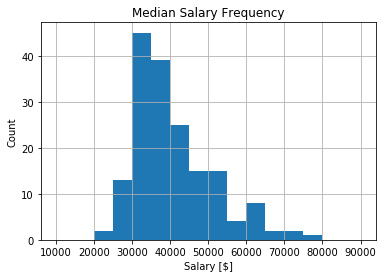

In [11]:
ax = data['Median'].hist(bins=16, range=(10000,90000))
ax.set_title('Median Salary Frequency')
ax.set_xlabel('Salary [$]')
ax.set_ylabel('Count')

#### Answer:
If we divide the median salary data into bins for every \$5000 increment, the \$30-35k range has the most common median salary range.

## Exploring relationships between variables

#### Do students in more popular majors make less money?

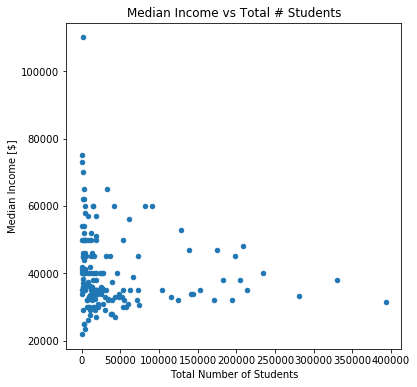

In [12]:
ax = data.plot(x='Total', y='Median', kind='scatter', figsize=(6,6))
ax.set_title('Median Income vs Total # Students')
ax.set_xlabel('Total Number of Students')
ax.set_ylabel('Median Income [$]')

#### Answer: No visible correlation

#### Do students that majored in majority-female subjects make less money?

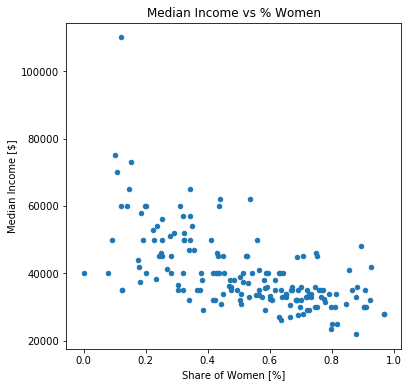

In [13]:
ax = data.plot(x='ShareWomen', y='Median', kind='scatter', figsize=(6,6))
ax.set_title('Median Income vs % Women')
ax.set_xlabel('Share of Women [%]')
ax.set_ylabel('Median Income [$]')

#### Answer:
There's a weak negative correlation between median income and the share of women in the major.

#### What are the percentages of women in the 10 highest paying majors?

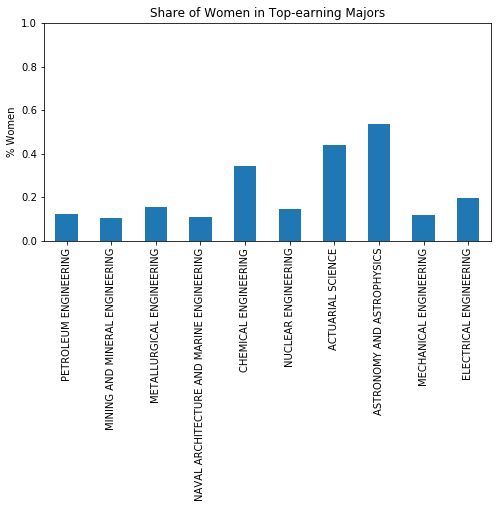

In [14]:
top_paying = data[0:10] # our data is sorted

# We can use the Series.plot method
ax = top_paying['ShareWomen'].plot(kind = 'bar', figsize=(8,4))
ax.set_title('Share of Women in Top-earning Majors')
ax.set_ylabel('% Women')
ax.set_ylim(0,1)
xlabels = list(data[0:10]['Major'])
ax.set_xticklabels(xlabels)
plt.show()

#### Answer:
The share of women in the top 10 highest earning majors varies between 12% and 54%.  
Most of the highest earning majors are male-dominated.  
Seven out of ten have 20% women or less. 

#### What are the percentages of women in the 10 lowest paying majors?

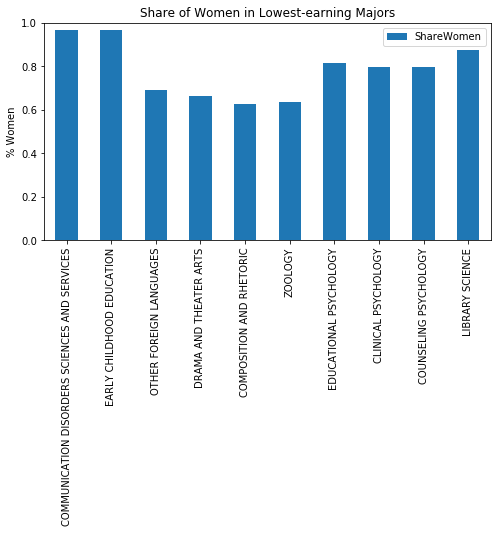

In [15]:
n = data.shape[0] # number of majors
lowest_paying = data[n-10:]

# We can use the Dataframe.plot.bar method
ax = lowest_paying.plot.bar(x='Major', y='ShareWomen', figsize=(8,4))
ax.set_ylim(0,1)
ax.set_title('Share of Women in Lowest-earning Majors')
ax.set_ylabel('% Women')
ax.set_xlabel('')
plt.show()

#### Answer:
The share of women in the 10 lowest-earning majors varies between 63% and 97%.  
Most of the lowest earning majors are female-dominated.  
Six out of ten have 80% women or more. 

#### What are the unemployment rates for the 10 highest paying and the 10 lowest paying majors?

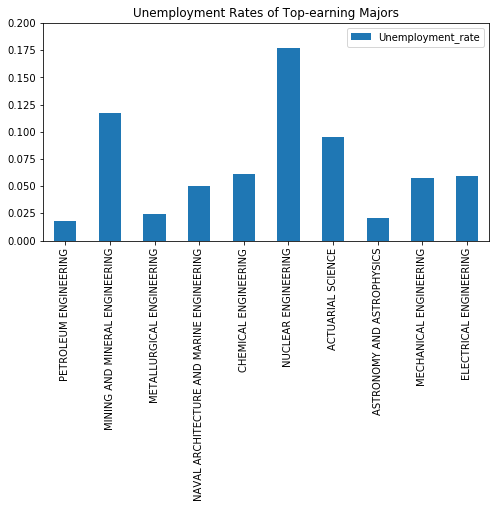

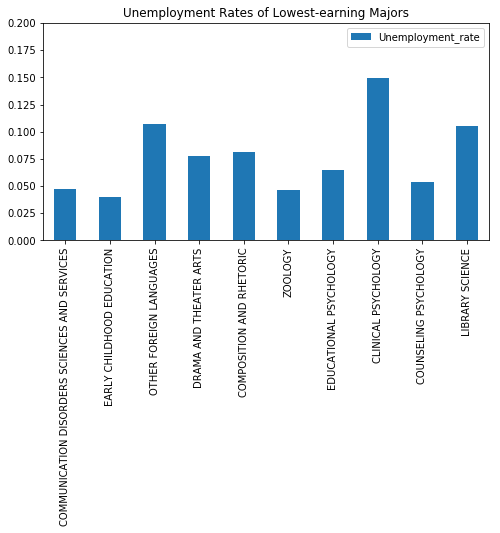

In [16]:
ax1 = top_paying.plot.bar(x='Major', y='Unemployment_rate', figsize=(8,4))
ax1.set_ylim(0,.2)
ax1.set_title('Unemployment Rates of Top-earning Majors')
ax1.set_xlabel('')
ax2 = lowest_paying.plot.bar(x='Major', y='Unemployment_rate', figsize=(8,4))
ax2.set_ylim(0,.2)
ax2.set_title('Unemployment Rates of Lowest-earning Majors')
ax2.set_xlabel('')
plt.show()

In [17]:
# average unemployment rates
top_paying['Unemployment_rate'].mean()
lowest_paying['Unemployment_rate'].mean()

# weighted average of unemployment rates for the Top-earning majors
top_product = top_paying['Total'] * top_paying['Unemployment_rate']
top_weighted_avg = top_product.sum() / top_paying['Total'].sum()

# weighted average of unemployment rates for the Lowest-earning majors
low_product = lowest_paying['Total'] * lowest_paying['Unemployment_rate']
low_weighted_avg = low_product.sum() / lowest_paying['Total'].sum()

#### Answer:
The unemployment rates for the top-earning majors range from 2% to 18%, with an average of 7%. If you weight each top-earning major by number of people, the weighted average of unemployment rates is 6%.  
The unemployment rates for the lowest-earning majors range from 4 to 15%, with an average of 8%. The weighted average of their unemployment rates is 6%. 
These findings are surprising. I would have expected the lowest-earning majors to have higher unemployment rates than top-earning majors, but they don't. 

#### How do the number of men vs. the number of women compare in each category of majors?

In [18]:
# 10 major categories that encompass the most majors
common_categories = data['Major_category'].value_counts().head(10)
categories = common_categories.index
print(common_categories)

Engineering                        29
Education                          16
Humanities & Liberal Arts          15
Biology & Life Science             14
Business                           13
Health                             12
Computers & Mathematics            11
Physical Sciences                  10
Agriculture & Natural Resources     9
Social Science                      9
Name: Major_category, dtype: int64


In [19]:
# count up the Men and Women totals per common major category
indexes = []
men_totals = []
women_totals = []
for category in categories:
    subset = data[data['Major_category'] == category]
    indexes.append(category)
    men_totals.append(subset['Men'].sum())
    women_totals.append(subset['Women'].sum())

# create series objects
men_series = pd.Series(data=men_totals, index = indexes)
women_series = pd.Series(data=women_totals, index = indexes)
sharewomen_series = women_series / (men_series + women_series)
sharemen_series = men_series / (men_series + women_series)

# create a dataframe
cat_df = pd.concat([common_categories, men_series, women_series, sharewomen_series, sharemen_series], axis=1)
cat_df.columns = ['Major_category_count', 'Men', 'Women', 'ShareWomen', 'ShareMen']

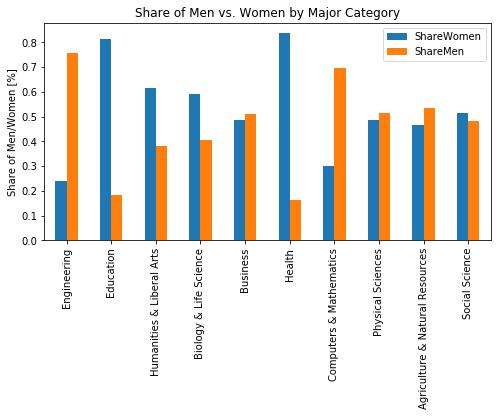

In [20]:
ax = cat_df[['ShareWomen','ShareMen']].plot.bar(figsize=(8,4))
ax.set_title('Share of Men vs. Women by Major Category')
ax.set_ylabel('Share of Men/Women [%]')

#### Answer:
Men respresent a much higher share of the Engineering and Computers & Mathematics major categories.
Women represent a much higher share of the Education, Health, and Psychology & Social Work major categories. They also represent a slighlty higher share of the Humanities & Liberal Arts and Biology & Life Science major categories.

#### Are the male-dominated major categories the higher-paying major categories?

Estimating the average earnings per major category:  
We don't have the earnings of each person in our dataset, just the median earnings for each major. To get an estimate the earnings for each major category, we can take the mean of the median salaries for the majors within that category (weighted by the total # of people in each major). This does NOT represent either the mean earnings per category nor the median earnings per category, but rather a hybrid average. In other words, this is ugly and scrappy. It's the best we can do.

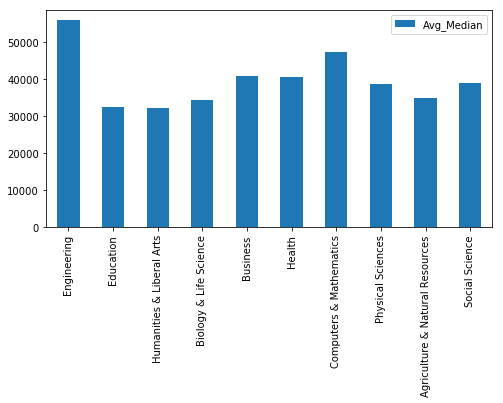

In [21]:
# calculated the weighted average of median incomes in the major category
# note we are weighting the median income of each major by the total number of people in that major
weighted_avg = []
for category in categories:
    subset = data[data['Major_category'] == category]
    product = subset['Total'] * subset['Median']
    weighted_avg_median = product.sum() / subset['Total'].sum()
    weighted_avg.append(weighted_avg_median)

avg_series = pd.Series(data=weighted_avg, index=indexes)
df = pd.concat([cat_df, avg_series], axis = 1)
df.columns = ['Major_category_count', 'Men', 'Women', 'ShareWomen', 'ShareMen', 'Avg_Median']
ax = df.plot.bar(x=df.index, y='Avg_Median', figsize=(8,4))


#### Answer:  
Yes. Engineering and Computers & Mathematics have the highest average earnings.  
Education, Psychology & Social Work, and Humanities & Liberal Arts are the lowest earning major categories.

# Part 2

## Summary
* Foo
* Foo

## Source
The Department of Education Statistics releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. Randal Olson from the University of Pennsylvania compiled this data set to explore the gender gap in STEM fields, and made the data available on his personal website [here](http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv). Thanks Randal!



### Quick Summary of the dataset

The data set is broken up into 17 categories of degrees, with each column as a separate category of bachelors degree. The values in each column represent the historical percentage degrees awarded to women for each category.

In [22]:
women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

In [23]:
women_degrees.head(3)

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1


### STEM Degrees Awarded By Gender

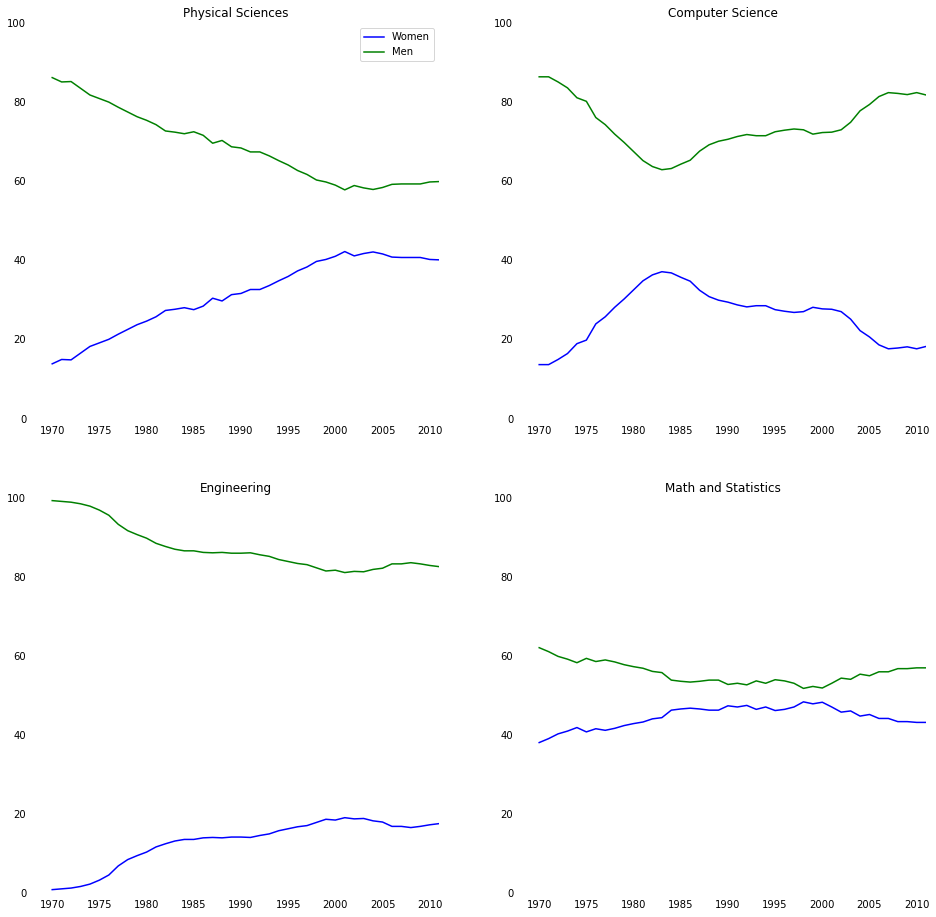

In [31]:
major_cats = ['Physical Sciences', 'Computer Science', 'Engineering', 'Math and Statistics']
fig = plt.figure(figsize=(16,16))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c='blue', label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c='green', label='Men')
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(bottom='off',top='off',left='off', right='off')
    ax.set_title(major_cats[sp])

# Calling pfig.add_subplot(2,2,1) here will add the legend to the first subplot that was created.
ax = fig.add_subplot(2,2,1)
plt.legend(loc='upper right')
plt.show()

### Other Degrees Awarded By Gender

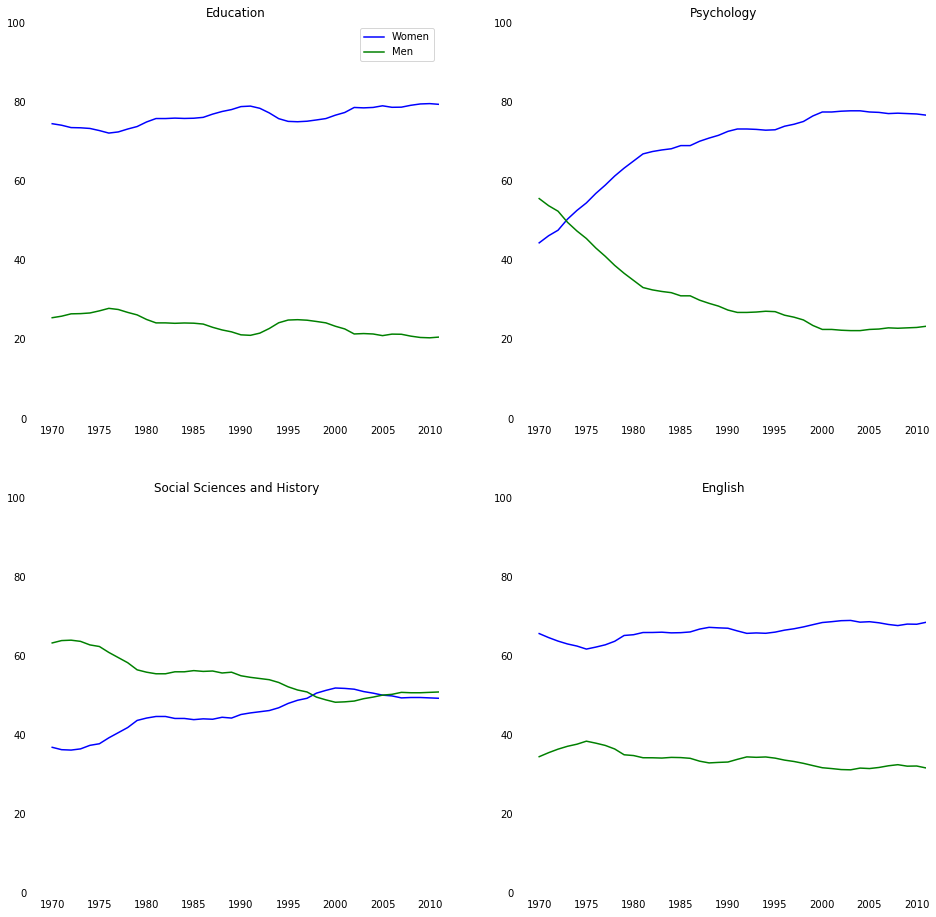

In [32]:
major_cats = ['Education', 'Psychology', 'Social Sciences and History', 'English']
fig = plt.figure(figsize=(16,16))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c='blue', label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c='green', label='Men')
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(bottom='off',top='off',left='off', right='off')
    ax.set_title(major_cats[sp])

# Calling pfig.add_subplot(2,2,1) here will add the legend to the first subplot that was created.
ax = fig.add_subplot(2,2,1)
plt.legend(loc='upper right')
plt.show()